In [1]:
#Data Analysis 
#Histogram, stacked bar charts, scatter trends

import numpy as np
import pandas as pd
import io

#read excel file with path directory
df = pd.read_excel(r'C:\Users\mkhazaieli\Documents\COH-PlanApproval-Analysis_test.xlsx')
len(df)

2080

In [2]:
#clean up dataframe

df.dropna(inplace = True) #confirm...
df.drop(df.loc[df['Tx_Technique']=='*tbd*'].index, inplace=True)
df.drop(df.loc[df['Tx_Machine']=='*tbd*'].index, inplace = True)
df.drop(df.loc[df['Tx_Machine']=='21 Ex'].index, inplace = True)
df.replace(to_replace = "SRS-Aktina",value = "SRS-Vision RT", inplace = True)
len(df)

1360

In [3]:
#'clinic days approval treat' & 'clinic days sim treat' less than 0 [removed]

indexNames = df[df['Clinic_Days_PlanApproval_Treat'] <= -1 ].index
print("entries with clinic days plan approval treat <0 =", len(indexNames))
df.drop(indexNames , inplace=True) #drop rows with 'clinic days plan approval treat' less than 0
len(df)

simindex = df[df['Clinic_Days_Sim_Treat'] <= -1 ].index
df.drop(simindex , inplace=True) 

len(df)

entries with clinic days plan approval treat <0 = 37


1322

C:\Users\mkhazaieli\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Clinic_Days_PlanApproval_Treat'>

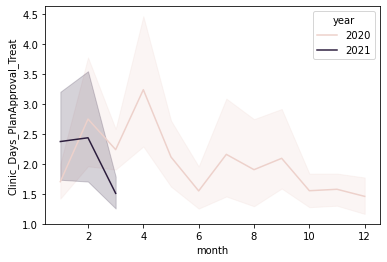

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

df['Complete_First_Treatment'] = pd.to_datetime(df['Complete_First_Treatment'])
timedf = df[["Complete_First_Treatment","Clinic_Days_PlanApproval_Treat"]].dropna()
timedf['month'] = timedf['Complete_First_Treatment'].dt.month
timedf['year'] = timedf['Complete_First_Treatment'].dt.year
timedf.head()


sns.lineplot(timedf['month'], timedf['Clinic_Days_PlanApproval_Treat'], hue = timedf['year'])

#sns.boxplot(timedf['month'],timedf['Clinic_Days_PlanApproval_Treat'])

In [20]:
timedf.head()

,Complete_First_Treatment,Clinic_Days_PlanApproval_Treat,month,year
1,2021-03-16 14:30:00,1,3,2021
2,2021-03-16 14:00:00,1,3,2021
3,2021-03-16 10:30:00,1,3,2021
4,2021-03-16 10:15:00,1,3,2021
5,2021-03-16 10:00:00,1,3,2021


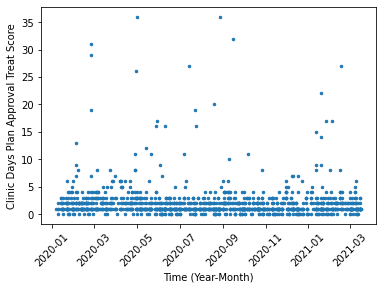

In [86]:
#trend plot 
import matplotlib.pyplot as plt
import matplotlib

dates = matplotlib.dates.date2num(df['Complete_First_Treatment'])

fig, trend = plt.subplots()
plt.plot_date(dates, df['Clinic_Days_PlanApproval_Treat'], markersize = 2.5)
trend.set_xlabel("Time (Year-Month)")
trend.set_ylabel("Clinic Days Plan Approval Treat Score")
trend.tick_params(axis = 'x', labelrotation = 45)

plt.show()

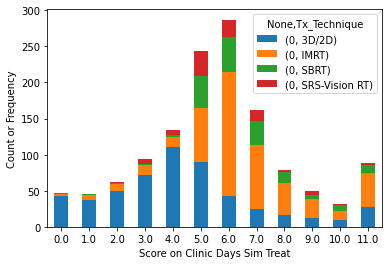

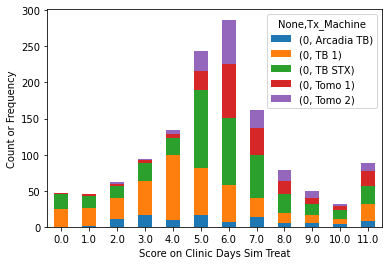

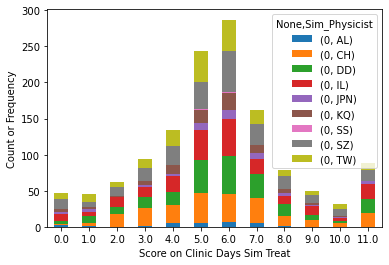

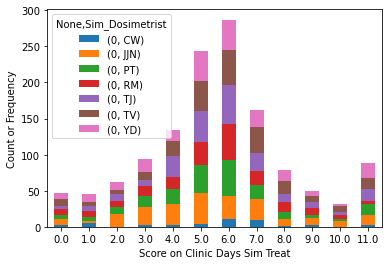

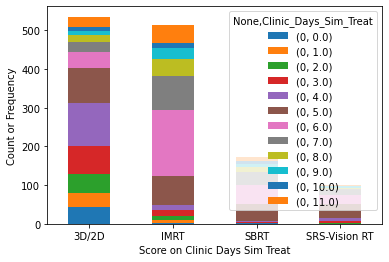

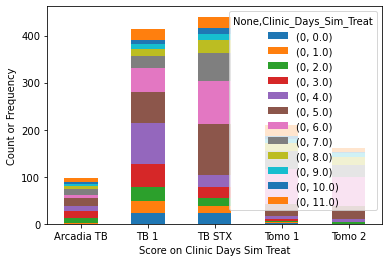

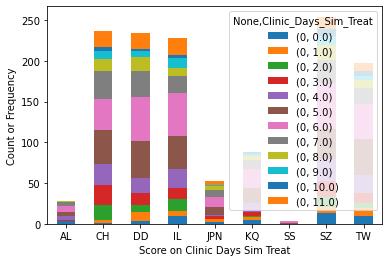

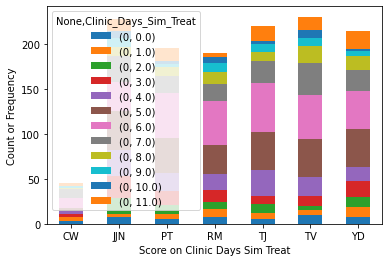

In [5]:
# stacked bar of 'clinic days sim treat'

b = np.array(df['Clinic_Days_Sim_Treat'].values.tolist())
df['Clinic_Days_Sim_Treat'] = np.where((b>-1) & (b<8), 0, b).tolist()
df['Clinic_Days_Sim_Treat'] = np.where((b>7) & (b<11), 8, b).tolist()
df['Clinic_Days_Sim_Treat'] = np.where(b>10, 11, b).tolist()

techniquedf2 = df[['Clinic_Days_Sim_Treat','Tx_Technique']].dropna()
machinedf2 = df[['Clinic_Days_Sim_Treat','Tx_Machine']].dropna()
physicistdf2 = df[['Clinic_Days_Sim_Treat','Sim_Physicist']].dropna()
dosimetristdf2 = df[['Clinic_Days_Sim_Treat','Sim_Dosimetrist']].dropna()

techniquedata2 = techniquedf2.groupby(["Clinic_Days_Sim_Treat","Tx_Technique"]).size().reset_index()
machinedata2 = machinedf2.groupby(["Clinic_Days_Sim_Treat","Tx_Machine"]).size().reset_index()
physdata2 = physicistdf2.groupby(["Clinic_Days_Sim_Treat","Sim_Physicist"]).size().reset_index()
dosdata2 = dosimetristdf2.groupby(["Clinic_Days_Sim_Treat","Sim_Dosimetrist"]).size().reset_index()

tech2 = techniquedata2.pivot(index = 'Clinic_Days_Sim_Treat', columns = 'Tx_Technique').fillna(0)
mach2 = machinedata2.pivot(index = 'Clinic_Days_Sim_Treat', columns = 'Tx_Machine').fillna(0)
phys2 = physdata2.pivot(index = 'Clinic_Days_Sim_Treat', columns = 'Sim_Physicist').fillna(0)
dos2 = dosdata2.pivot(index = 'Clinic_Days_Sim_Treat', columns = 'Sim_Dosimetrist').fillna(0)

tech3 = techniquedata2.pivot(index = 'Tx_Technique', columns = 'Clinic_Days_Sim_Treat').fillna(0)
mach3 = machinedata2.pivot(index = 'Tx_Machine', columns = 'Clinic_Days_Sim_Treat').fillna(0)
phys3 = physdata2.pivot(index = 'Sim_Physicist', columns = 'Clinic_Days_Sim_Treat').fillna(0)
dos3 = dosdata2.pivot(index = 'Sim_Dosimetrist', columns = 'Clinic_Days_Sim_Treat').fillna(0)

bar1 = tech2.plot(kind = 'bar', stacked = True)

bar2 = mach2.plot(kind = 'bar', stacked = True)

bar3 = phys2.plot(kind = 'bar', stacked = True)

bar4 = dos2.plot(kind = 'bar', stacked = True)

bar5 = tech3.plot(kind = 'bar', stacked = True)

bar6 = mach3.plot(kind = 'bar', stacked = True)

bar7 = phys3.plot(kind = 'bar', stacked = True)

bar8 = dos3.plot(kind = 'bar', stacked = True)


bars = [bar5, bar6, bar7, bar8]

for bar in bars:
    bar.set_xlabel("Score on Clinic Days Sim Treat")
    bar.set_ylabel("Count or Frequency")
    bar.tick_params(axis = 'x', labelrotation = 0)

barsclinic = [bar1, bar2, bar3, bar4]

for bar in barsclinic:
    bar.set_xlabel("Score on Clinic Days Sim Treat")
    bar.set_ylabel("Count or Frequency")
    bar.tick_params(axis = 'x', labelrotation = 0)

In [ ]:
#######sorting data further#######

#df['Clinic_Days_Sim_Treat'] = np.where(df['Clinic_Days_Sim_Treat'].between(0,7), 0, df['Clinic_Days_Sim_Treat'])
#df['Clinic_Days_Sim_Treat'] = np.where(df['Clinic_Days_Sim_Treat'].between(8,10),8 , df['Clinic_Days_Sim_Treat'])
#df['Clinic_Days_Sim_Treat'] = np.where(df['Clinic_Days_Sim_Treat']>10, 11, df['Clinic_Days_Sim_Treat'])


#df['Clinic_Days_Sim_Treat'].where((b>-1) & (b<8), 0, b)
#df['Clinic_Days_Sim_Treat'].where((b>7) & (b<11), 8, b)
#df['Clinic_Days_Sim_Treat'].where(b>10, 11, b)


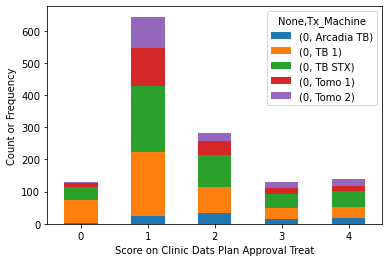

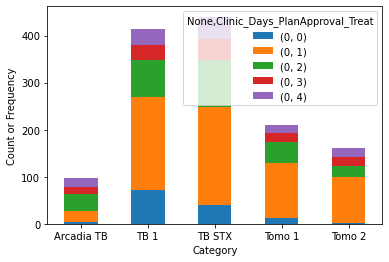

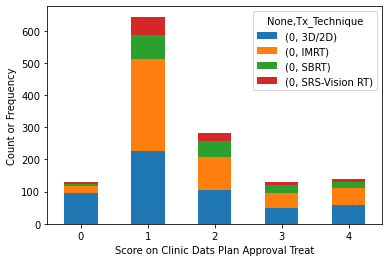

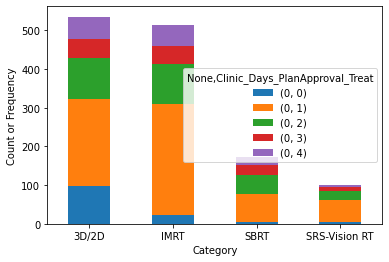

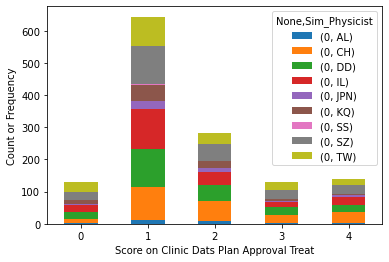

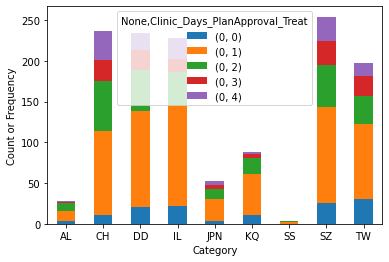

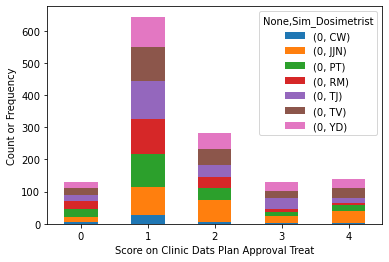

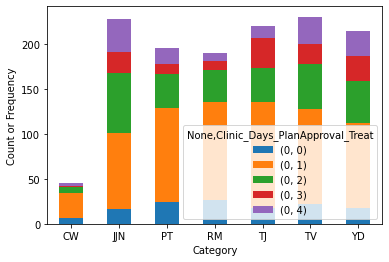

In [121]:
# stacked bar of 'clinic days plan approval treat'
a = np.array(df['Clinic_Days_PlanApproval_Treat'].values.tolist())
df['Clinic_Days_PlanApproval_Treat'] = np.where(a > 3, 4, a).tolist()
#indexNames = df[df['Clinic_Days_PlanApproval_Treat'] <= -1 ].index
#df.drop(indexNames , inplace=True)

techniquedf = df[['Clinic_Days_PlanApproval_Treat','Tx_Technique']].dropna()
diagnosisdf = df[['Clinic_Days_PlanApproval_Treat','Diagnosis']].dropna()
machinedf = df[['Clinic_Days_PlanApproval_Treat','Tx_Machine']].dropna()
physicistdf = df[['Clinic_Days_PlanApproval_Treat','Sim_Physicist']].dropna()
dosimetristdf = df[['Clinic_Days_PlanApproval_Treat','Sim_Dosimetrist']].dropna()

techniquedata = techniquedf.groupby(["Clinic_Days_PlanApproval_Treat","Tx_Technique"]).size().reset_index()
machinedata = machinedf.groupby(["Clinic_Days_PlanApproval_Treat","Tx_Machine"]).size().reset_index()
diagnosisdata = diagnosisdf.groupby(["Clinic_Days_PlanApproval_Treat","Diagnosis"]).size().reset_index()
physicistdata = physicistdf.groupby(["Clinic_Days_PlanApproval_Treat","Sim_Physicist"]).size().reset_index()
dosimetristdata = dosimetristdf.groupby(["Clinic_Days_PlanApproval_Treat","Sim_Dosimetrist"]).size().reset_index()

tech = techniquedata.pivot(index = 'Clinic_Days_PlanApproval_Treat', columns = 'Tx_Technique').fillna(0)
mach = machinedata.pivot(index = 'Clinic_Days_PlanApproval_Treat',columns = 'Tx_Machine').fillna(0)
diag = diagnosisdata.pivot(index = 'Clinic_Days_PlanApproval_Treat', columns = 'Diagnosis').fillna(0)
phys = physicistdata.pivot(index = 'Clinic_Days_PlanApproval_Treat', columns = 'Sim_Physicist').fillna(0)
dos = dosimetristdata.pivot(index = 'Clinic_Days_PlanApproval_Treat', columns='Sim_Dosimetrist').fillna(0)

tech1 = techniquedata.pivot(index = 'Tx_Technique', columns = 'Clinic_Days_PlanApproval_Treat').fillna(0)
mach1 = machinedata.pivot(index = 'Tx_Machine',columns = 'Clinic_Days_PlanApproval_Treat').fillna(0)
diag1 = diagnosisdata.pivot(index = 'Diagnosis', columns = 'Clinic_Days_PlanApproval_Treat').fillna(0)
phys1 = physicistdata.pivot(index = 'Sim_Physicist', columns = 'Clinic_Days_PlanApproval_Treat').fillna(0)
dos1 = dosimetristdata.pivot(index = 'Sim_Dosimetrist', columns='Clinic_Days_PlanApproval_Treat').fillna(0)

ax0 = mach.plot(kind = 'bar', stacked = True)
ax1 = mach1.plot(kind = 'bar', stacked = True)

ax2 = tech.plot(kind='bar', stacked=True)
ax3 = tech1.plot(kind = 'bar', stacked = True)

ax4 = phys.plot(kind='bar', stacked=True)
ax5 = phys1.plot(kind = 'bar', stacked = True)

ax6 = dos.plot(kind='bar', stacked=True)
ax7 = dos1.plot(kind = 'bar', stacked = True)

ax = [ax0,ax2,ax4, ax6]
for ax in ax:
    ax.set_xlabel("Score on Clinic Dats Plan Approval Treat")
    ax.set_ylabel("Count or Frequency")
    ax.tick_params(axis = 'x', labelrotation = 0)
    
axf = [ax1,ax3,ax5,ax7]
for ax in axf:
    ax.set_xlabel("Category")
    ax.set_ylabel("Count or Frequency")
    ax.tick_params(axis = 'x', labelrotation = 0)

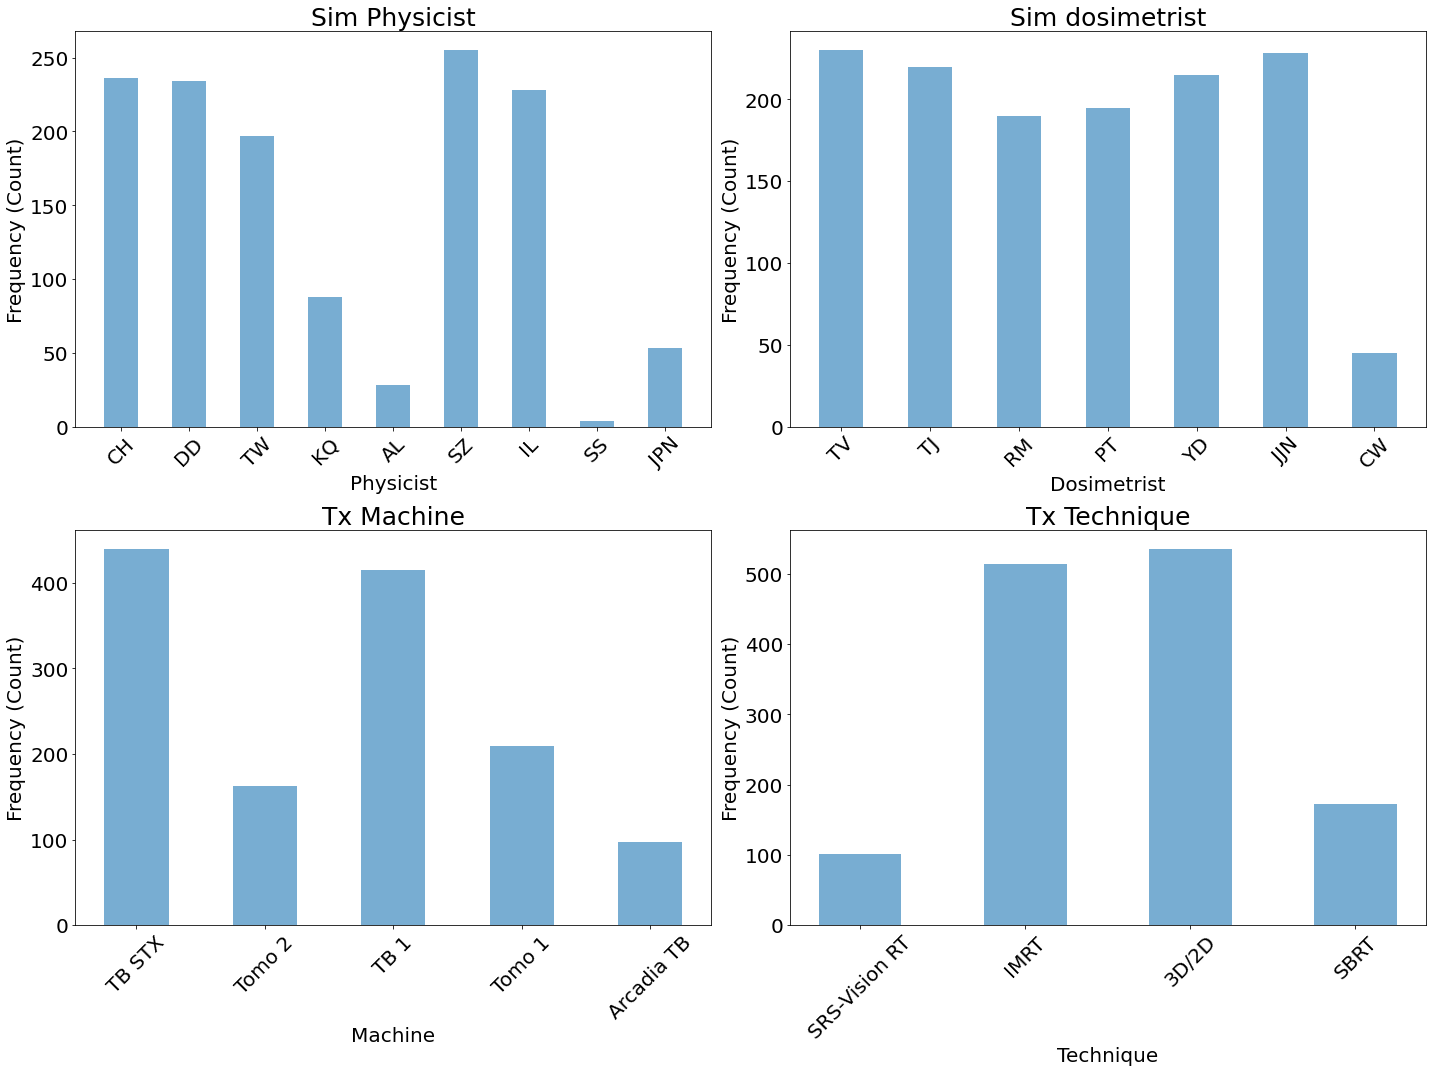

In [70]:
# histograms
import matplotlib.pyplot as plt
#import pylab as plt
#%matplotlib inline

df = {
    'Sim_Physicist': df['Sim_Physicist'].astype(str),
    'Sim_Dosimetrist': df['Sim_Dosimetrist'].astype(str),'Tx_Machine': df['Tx_Machine'].astype(str),
    'Tx_Technique': df['Tx_Technique'].astype(str)}

fig, axs = plt.subplots(2,2, figsize = (20,15))


axs[0,0].hist(df['Sim_Physicist'], bins = np.arange(len(pd.unique(df['Sim_Physicist']))+1)-0.5, rwidth = 0.5, alpha = 0.6)
axs[0, 0].set_title('Sim Physicist', fontsize = 25)
axs[0,0].set_xlabel('Physicist', fontsize =20)
axs[0,0].tick_params(axis='x', labelrotation = 45)

axs[0,1].hist(df['Sim_Dosimetrist'], bins = np.arange(len(pd.unique(df['Sim_Dosimetrist']))+1)-0.5, rwidth = 0.5, alpha = 0.6)
axs[0, 1].set_title('Sim dosimetrist', fontsize = 25)
axs[0,1].set_xlabel('Dosimetrist', fontsize = 20)
axs[0,1].tick_params(axis='x', labelrotation = 45)

axs[1,0].hist(df['Tx_Machine'], bins = np.arange(len(pd.unique(df['Tx_Machine']))+1)-0.5, rwidth = 0.5,alpha = 0.6)
axs[1, 0].set_title('Tx Machine', fontsize = 25)
axs[1,0].set_xlabel('Machine', fontsize = 20)
axs[1,0].tick_params(axis='x', labelrotation = 45)

axs[1,1].hist(df['Tx_Technique'], bins = np.arange(len(pd.unique(df['Tx_Technique']))+1)-0.5, rwidth = 0.5, alpha = 0.6)
axs[1, 1].set_title('Tx Technique', fontsize = 25)
axs[1,1].set_xlabel('Technique', fontsize = 20)
axs[1,1].tick_params(axis='x', labelrotation = 45)

for ax in axs.flat:
    #ax.set(ylabel='Frequency (Count)')
    ax.set_ylabel('Frequency (Count)',fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)


plt.tight_layout()

#plt.hist(df['Sim_Physicist'], align="right",bins = 8, rwidth = 0.5, alpha = 0.5)
